# Deep Learning y Sistemas Inteligentes - Laboratorio 8
## Predicción de Meses de Ventas
- - -
### Integrantes:
- Diego Alberto Leiva 21752
- José Pablo Orellana 21970
- María Marta Ramírez 21342
- - -

Se le proporcionan 5 años de datos de ventas de artículos de una cadena de tiendas y se le pide que prediga 3 meses de ventas para 50 artículos diferentes en 10 tiendas diferentes. Descarguen el dataset de Kaggle aquí por favor. 

### Librerías

In [20]:
# Manipulacion de datos
import pandas as pd
import numpy as np

# Librerias para visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias para PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
#from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#from factor_analyzer.factor_analyzer import calculate_kmo

# Librerias para preprocesamiento
from sklearn.preprocessing import StandardScaler

# libreiras para pipeline
from sklearn.pipeline import make_pipeline

# Librerias para reglas de asociacion
#from apyori import apriori

### Cargar el Dataset

In [6]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

### Visualizar estructura e información general del dataset

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [9]:
print(f"El dataset contiente: {train_df.shape[0]} observaciones y {train_df.shape[1]} variables")
print(f"El dataset contiente: {test_df.shape[0]} observaciones y {test_df.shape[1]} variables")

El dataset contiente: 913000 observaciones y 4 variables
El dataset contiente: 45000 observaciones y 4 variables


In [11]:
train_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [12]:
test_df.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


#### Variables identificadas
- **id:** Identificador unico 
- **date:** Fecha de la venta
- **store:** Tienda que realizó la venta
- **item:** Objeto vendido
- **sales:** Ventas de ciertos items

### Procesamiento y Limpieza de Datos
#### Verificación y manejo de valores nulos o faltantes
##### Visualizar la data faltante

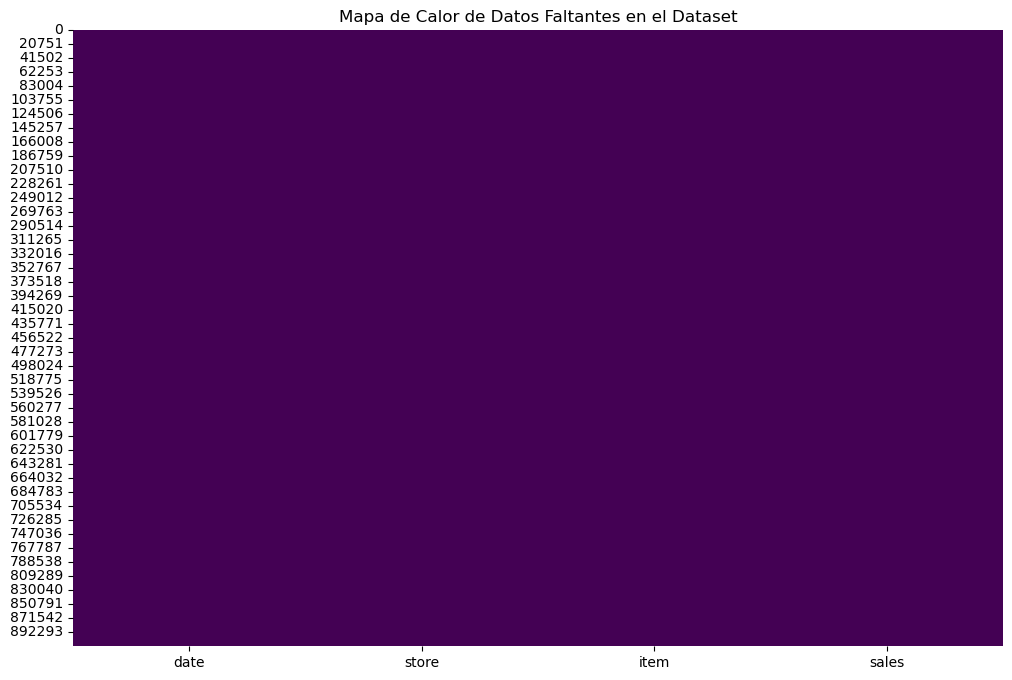

In [13]:
# Crear un mapa de calor para visualizar los datos faltante
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes en el Dataset')
plt.show()

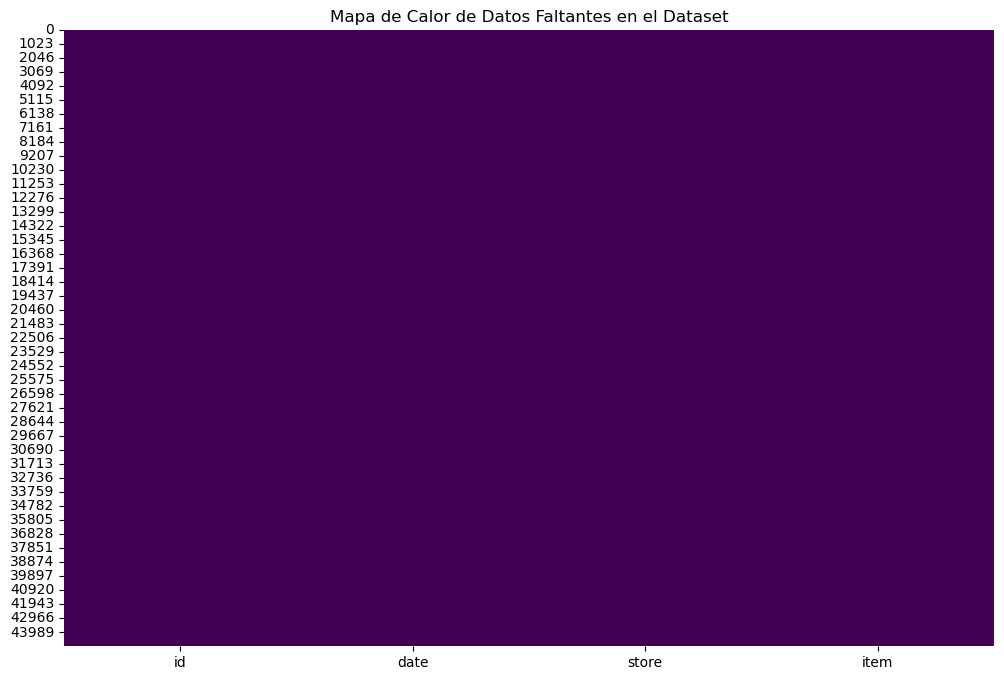

In [14]:
# Crear un mapa de calor para visualizar los datos faltante
plt.figure(figsize=(12, 8))
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes en el Dataset')
plt.show()

##### Porcentaje de valores nulos

In [15]:
# Calcular el porcentaje de valores nulos para cada tipo
null_percentage_numeric = train_df.isnull().mean() * 100
print(f"Porcentaje de data faltante en variables numericas:")
print(null_percentage_numeric.sort_values(ascending=False))

Porcentaje de data faltante en variables numericas:
date     0.0
store    0.0
item     0.0
sales    0.0
dtype: float64


In [16]:
# Calcular el porcentaje de valores nulos para cada tipo
null_percentage_numeric = test_df.isnull().mean() * 100
print(f"Porcentaje de data faltante en variables numericas:")
print(null_percentage_numeric.sort_values(ascending=False))

Porcentaje de data faltante en variables numericas:
id       0.0
date     0.0
store    0.0
item     0.0
dtype: float64


Como se puede observar en lo anterior mostrado. En el dataset no se poseen valores nulos por lo que no se deberá proceder con la eliminación o sustitución de valores en alguna de las variables presentes.

#### Conversión de fechas
Para este dataset tenemos fechas por lo que se procederá a darle un formato específico a estas variables.

In [17]:
# Convertir la columna 'date' a formato datetime
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Crear nuevas características basadas en la fecha
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['day_of_week'] = train_df['date'].dt.dayofweek

test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['day_of_week'] = test_df['date'].dt.dayofweek


In [18]:
train_df.head()

,date,store,item,sales,year,month,day,day_of_week
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


In [21]:
test_df.head()

,id,date,store,item,year,month,day,day_of_week
0,0,2018-01-01,1,1,2018,1,1,0
1,1,2018-01-02,1,1,2018,1,2,1
2,2,2018-01-03,1,1,2018,1,3,2
3,3,2018-01-04,1,1,2018,1,4,3
4,4,2018-01-05,1,1,2018,1,5,4


Es probable que se necesite convertir la columna date a un formato de fecha y extraer características adicionales como el mes, el día o el día de la semana para que el modelo pueda capturar patrones temporales.

#### Escalado de datos

In [25]:
# Normalizar la columna 'sales'
scaler = MinMaxScaler()
train_df['sales_scaled'] = scaler.fit_transform(train_df[['sales']])

In [26]:
train_df.head()

,date,store,item,sales,year,month,day,day_of_week,sales_scaled
0,2013-01-01,1,1,13,2013,1,1,1,0.056277
1,2013-01-02,1,1,11,2013,1,2,2,0.047619
2,2013-01-03,1,1,14,2013,1,3,3,0.060606
3,2013-01-04,1,1,13,2013,1,4,4,0.056277
4,2013-01-05,1,1,10,2013,1,5,5,0.043290
